In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/Kaggle/


/content/drive/MyDrive/Colab Notebooks/Kaggle


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Colab Notebooks/Kaggle"

In [ ]:
!kaggle datasets download -d mlg-ulb/creditcardfraud

 82% 54.0M/66.0M [00:00<00:00, 198MB/s]
100% 66.0M/66.0M [00:00<00:00, 191MB/s]


In [ ]:
!unzip creditcardfraud.zip

Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import tensorflow as tf


from keras.models import Model, load_model
from keras.layers import Input, Dense, Activation

In [ ]:
Raw=pd.read_csv('creditcard.csv')
Raw

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


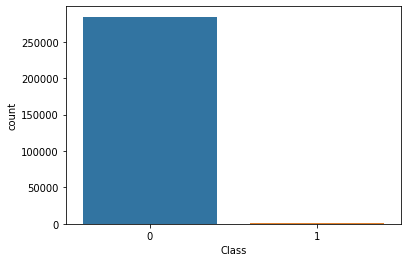

In [ ]:
sns.countplot(x='Class',data=Raw)

In [ ]:
#Data Preprocessing
data = Raw.drop(columns=[ 'Time'])
data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))
X=data.drop(columns=['Class'])
Y=data["Class"]
print ("X: ",X.shape," Y: ",Y.shape)
Xtr, Xte, Ytr, Yte = train_test_split(X , Y, test_size=0.2, random_state=0)
print ("Train Size: ",len(Ytr)," Test Size: ", len(Yte))

X:  (284807, 29)  Y:  (284807,)
Train Size:  227845  Test Size:  56962


**Oversampling**

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
Xtr_os, Ytr_os = sm.fit_resample(Xtr, Ytr)

In [ ]:
from collections import Counter
print('Resampled dataset shape', Counter(Ytr_os))

Resampled dataset shape Counter({0: 227454, 1: 227454})


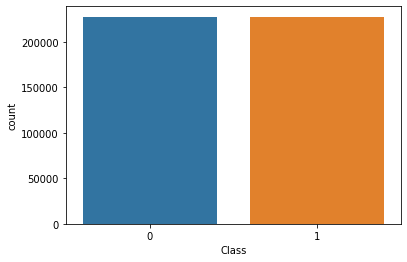

In [ ]:
sns.countplot(x="Class",data=pd.DataFrame(Ytr_os))

In [ ]:
tf.keras.backend.clear_session()

#Autoencoder model
input_layer = Input(shape=(29, ))
encode1 = Dense(22)(input_layer)
encode2 = Dense(15)(encode1)
encode3 = Dense(10)(encode2)
decode1 = Dense(15)(encode3)
decode2 = Dense(22)(decode1)
decoded = Dense(29)(decode2)
DAE = Model(input_layer,decoded)
DAE.compile(optimizer='adam',loss='mean_squared_error')
DAE.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 29)]              0         
                                                                 
 dense (Dense)               (None, 22)                660       
                                                                 
 dense_1 (Dense)             (None, 15)                345       
                                                                 
 dense_2 (Dense)             (None, 10)                160       
                                                                 
 dense_3 (Dense)             (None, 15)                165       
                                                                 
 dense_4 (Dense)             (None, 22)                352       
                                                                 
 dense_5 (Dense)             (None, 29)                667   

In [ ]:
#Add noise to train data

def gaussian_noise(x,mu,std):
    noise = np.random.normal(mu, std, size = x.shape)
    x_noisy = x + noise
    return x_noisy 

mu=0.0
std = 0.05
Xtr_os_n=gaussian_noise(Xtr_os,mu,std)
Xtr_os_n.shape

(454908, 29)

In [ ]:
xtr, xval, ytr, yval = train_test_split(Xtr_os_n , Xtr_os, test_size=0.1, random_state=0)
DAE.fit(xtr, ytr, epochs = 30, batch_size=128, validation_data=(xval,yval))

Epoch 1/30
3199/3199 [==============================] - 9s 3ms/step - loss: 0.8393 - val_loss: 0.4294
Epoch 2/30
3199/3199 [==============================] - 8s 2ms/step - loss: 0.4079 - val_loss: 0.4144
Epoch 3/30
3199/3199 [==============================] - 10s 3ms/step - loss: 0.4014 - val_loss: 0.4094
Epoch 4/30
3199/3199 [==============================] - 7s 2ms/step - loss: 0.3991 - val_loss: 0.4078
Epoch 5/30
3199/3199 [==============================] - 7s 2ms/step - loss: 0.3988 - val_loss: 0.4100
Epoch 6/30
3199/3199 [==============================] - 7s 2ms/step - loss: 0.3986 - val_loss: 0.4083
Epoch 7/30
3199/3199 [==============================] - 7s 2ms/step - loss: 0.3985 - val_loss: 0.4100
Epoch 8/30
3199/3199 [==============================] - 7s 2ms/step - loss: 0.3983 - val_loss: 0.4081
Epoch 9/30
3199/3199 [==============================] - 8s 3ms/step - loss: 0.3983 - val_loss: 0.4077
Epoch 10/30
3199/3199 [==============================] - 7s 2ms/step - loss: 0.39

In [ ]:
#Denoise Test data
Xte_dn_array=DAE.predict(Xte)
Xte_dn=pd.DataFrame(Xte_dn_array,columns=Xte.columns)

Xte_dn.shape

1781/1781 [==============================] - 2s 1ms/step


(56962, 29)

In [ ]:
Xte_dn

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.108920,0.670527,0.172037,-0.789806,0.615687,-0.446498,0.710861,-0.143574,-0.424707,-0.754611,...,0.176479,-0.236984,-0.043048,-0.002275,-0.100299,0.251947,0.003141,0.166670,0.093315,-0.211720
1,-0.236332,0.637447,0.344071,-0.726492,0.771692,-0.508231,0.392442,-0.098571,-0.185128,-0.488382,...,0.104498,-0.338137,0.041557,-0.069593,-0.071352,0.161270,-0.009995,0.107210,0.082037,-0.411769
2,-1.662916,-2.491858,0.282008,0.537929,2.152649,-1.181912,-1.142001,-0.001382,0.196127,0.250791,...,-0.236669,-0.097367,0.082978,-0.594239,0.013700,-0.272826,-0.031665,-0.030382,-0.172241,-0.194092
3,-2.401638,0.979769,0.698040,0.875765,-1.510318,1.303163,1.119303,-0.671209,-0.061397,0.823564,...,0.146560,0.413975,-0.066777,0.473532,0.013305,0.166760,-0.004339,-0.030043,0.117099,0.900374
4,1.507225,0.017236,-0.509297,0.080390,-0.013419,-0.056555,-0.358679,-0.208849,1.666485,0.537790,...,-0.012049,-0.433677,0.453625,-0.039063,0.027845,-0.430704,-0.053757,-0.223359,0.047821,-0.224674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56957,-1.058186,0.753358,0.748026,-2.510845,-0.078967,-0.492802,0.149988,0.393208,-0.135786,-0.728920,...,0.124693,-0.400102,0.069504,-0.094559,0.019545,0.222063,-0.080368,0.098098,0.043019,-0.480210
56958,1.159160,0.153203,0.305477,0.271406,0.003806,0.043465,-0.148072,0.134783,-0.153203,0.046028,...,-0.060543,0.054911,0.007252,-0.019348,0.016907,-0.042355,-0.012582,0.033236,-0.000516,-0.261149
56959,0.975301,-2.661213,-2.028298,0.405780,-0.728437,-0.012415,0.274644,-0.071267,0.446846,-0.642370,...,0.251195,0.336293,-0.024962,-0.015360,-0.038820,-0.223358,-0.014882,-0.010017,-0.148253,1.579749
56960,2.045362,-0.016099,-1.514016,0.278184,0.394656,-0.599078,-0.277990,0.080639,0.041193,-0.656040,...,0.050869,0.188103,-0.163856,-0.101881,-0.096742,-0.004950,0.008128,0.135736,0.015383,-0.158903


In [ ]:
#CLassifier
#Autoencoder model
input_layer = Input(shape=(29, ))
FC1 = Dense(22)(input_layer)
FC2 = Dense(15)(FC1)
FC3 = Dense(10)(FC2)
FC4 = Dense(5)(FC3)
FC5=Dense(2)(FC4)
out_layer = Activation('softmax')(FC5)
Classifier = Model(input_layer,out_layer)
Classifier.compile(optimizer='adam',loss='sparse_categorical_crossentropy')
Classifier.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 29)]              0         
                                                                 
 dense_6 (Dense)             (None, 22)                660       
                                                                 
 dense_7 (Dense)             (None, 15)                345       
                                                                 
 dense_8 (Dense)             (None, 10)                160       
                                                                 
 dense_9 (Dense)             (None, 5)                 55        
                                                                 
 dense_10 (Dense)            (None, 2)                 12        
                                                                 
 activation (Activation)     (None, 2)                 0   

**Model without oversampling and denoising**




In [ ]:

xtr, xval, ytr, yval = train_test_split(Xtr , Ytr, test_size=0.1, random_state=0)
Classifier.fit(xtr, ytr, epochs = 30, batch_size=128, validation_data=(xval,yval))

Epoch 1/30
1603/1603 [==============================] - 4s 2ms/step - loss: 0.0387 - val_loss: 0.0042
Epoch 2/30
1603/1603 [==============================] - 4s 3ms/step - loss: 0.0066 - val_loss: 0.0042
Epoch 3/30
1603/1603 [==============================] - 4s 2ms/step - loss: 0.0058 - val_loss: 0.0039
Epoch 4/30
1603/1603 [==============================] - 3s 2ms/step - loss: 0.0050 - val_loss: 0.0039
Epoch 5/30
1603/1603 [==============================] - 4s 3ms/step - loss: 0.0050 - val_loss: 0.0030
Epoch 6/30
1603/1603 [==============================] - 3s 2ms/step - loss: 0.0049 - val_loss: 0.0056
Epoch 7/30
1603/1603 [==============================] - 3s 2ms/step - loss: 0.0048 - val_loss: 0.0029
Epoch 8/30
1603/1603 [==============================] - 3s 2ms/step - loss: 0.0046 - val_loss: 0.0034
Epoch 9/30
1603/1603 [==============================] - 3s 2ms/step - loss: 0.0047 - val_loss: 0.0031
Epoch 10/30
1603/1603 [==============================] - 3s 2ms/step - loss: 0.004

In [ ]:
Y_pred=Classifier.predict(Xte)
yhat=Y_pred[:,1]


1781/1781 [==============================] - 2s 1ms/step


array([[9.9934250e-01, 6.5747532e-04],
       [9.9957925e-01, 4.2080242e-04],
       [9.9954110e-01, 4.5883350e-04],
       ...,
       [9.9972248e-01, 2.7759658e-04],
       [9.9857807e-01, 1.4219121e-03],
       [9.9992597e-01, 7.4070871e-05]], dtype=float32)

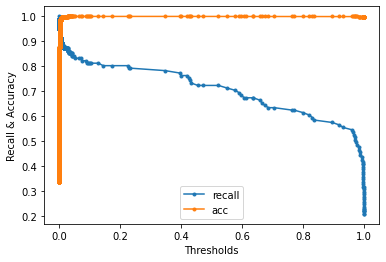

In [ ]:
from sklearn.metrics import precision_recall_curve,accuracy_score
yhat=Y_pred[:,1]
precision, recall, thresholds = precision_recall_curve(Yte, yhat)
plt.plot(thresholds, recall[:-1], marker='.', label='recall')
#ascores = [accuracy_score(Yte, (yhat >= t).astype('int')) for t in thresholds]
plt.plot(thresholds, ascores, marker='.', label='acc')
plt.xlabel('Thresholds')
plt.ylabel('Recall & Accuracy')
plt.legend(loc="lower center")
plt.show()

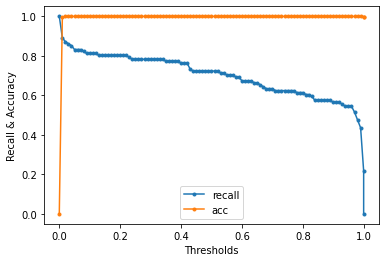

In [ ]:
from sklearn.metrics import f1_score, precision_score, accuracy_score,recall_score

yhat=Y_pred[:,1]

def to_labels(probs, threshold):
 return (probs >= threshold).astype('int')

thresholds = np.concatenate((np.arange(0, 1, 0.01), [1-10e-6,1]))

rscores = [recall_score(Yte, to_labels(yhat, t)) for t in thresholds]
ascores = [accuracy_score(Yte, to_labels(yhat, t)) for t in thresholds]
plt.plot(thresholds,rscores , marker='.', label='recall')
plt.plot(thresholds, ascores, marker='.', label='acc')

# axis labels
plt.xlabel('Thresholds')
plt.ylabel('Recall & Accuracy')
plt.legend()
# show the plot
plt.show()

**Model with oversampling and denoising**


In [ ]:

xtr, xval, ytr, yval = train_test_split(Xtr_os , Ytr_os, test_size=0.1, random_state=0)
Classifier.fit(xtr, ytr, epochs = 30, batch_size=128, validation_data=(xval,yval))

Epoch 1/30
3199/3199 [==============================] - 7s 2ms/step - loss: 0.1430 - val_loss: 0.1356
Epoch 2/30
3199/3199 [==============================] - 7s 2ms/step - loss: 0.1403 - val_loss: 0.1343
Epoch 3/30
3199/3199 [==============================] - 7s 2ms/step - loss: 0.1402 - val_loss: 0.1344
Epoch 4/30
3199/3199 [==============================] - 7s 2ms/step - loss: 0.1401 - val_loss: 0.1347
Epoch 5/30
3199/3199 [==============================] - 7s 2ms/step - loss: 0.1400 - val_loss: 0.1350
Epoch 6/30
3199/3199 [==============================] - 7s 2ms/step - loss: 0.1401 - val_loss: 0.1341
Epoch 7/30
3199/3199 [==============================] - 8s 3ms/step - loss: 0.1399 - val_loss: 0.1339
Epoch 8/30
3199/3199 [==============================] - 7s 2ms/step - loss: 0.1398 - val_loss: 0.1340
Epoch 9/30
3199/3199 [==============================] - 8s 3ms/step - loss: 0.1399 - val_loss: 0.1338
Epoch 10/30
3199/3199 [==============================] - 8s 2ms/step - loss: 0.139

In [ ]:
Y_pred1=Classifier.predict(Xte_dn)
yhat1=Y_pred1[:,1]

1781/1781 [==============================] - 2s 1ms/step


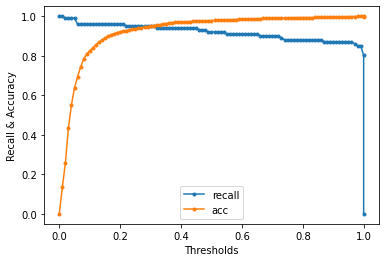

In [ ]:
from sklearn.metrics import f1_score, precision_score, accuracy_score,recall_score

yhat1=Y_pred1[:,1]

def to_labels(probs, threshold):
 return (probs >= threshold).astype('int')

thresholds = np.concatenate((np.arange(0, 1, 0.01), [1-10e-6,1]))

rscores = [recall_score(Yte, to_labels(yhat1, t)) for t in thresholds]
ascores = [accuracy_score(Yte, to_labels(yhat1, t)) for t in thresholds]
plt.plot(thresholds,rscores , marker='.', label='recall')
plt.plot(thresholds, ascores, marker='.', label='acc')

# axis labels
plt.xlabel('Thresholds')
plt.ylabel('Recall & Accuracy')
plt.legend()
# show the plot
plt.show()

In [ ]:

print("----------------------Model Metrics----------------------")
print("Precision: ",precision_score(Yte, to_labels(yhat1, 0.5)))
print("Accuracy: ",accuracy_score(Yte, to_labels(yhat1, 0.5)))
print("F1: ",f1_score(Yte, to_labels(yhat1, 0.5)))
print("Recall: ",recall_score(Yte, to_labels(yhat1, 0.5)))

----------------------Model Metrics----------------------
Precision:  0.0702416918429003
Accuracy:  0.9782486569994031
F1:  0.13052631578947368
Recall:  0.9207920792079208


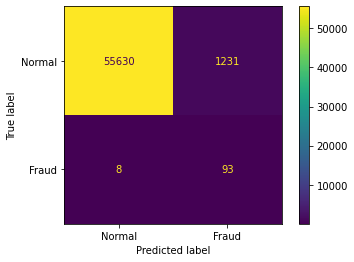

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(Yte, to_labels(yhat1, 0.5),display_labels=["Normal", "Fraud"])

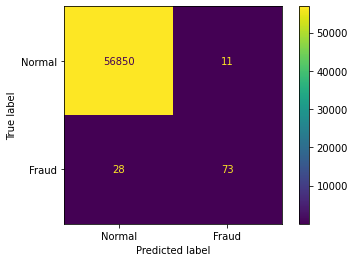

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(Yte, to_labels(yhat, 0.5),display_labels=["Normal", "Fraud"])